In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
Niter = 500000
mut = np.zeros(Niter+1)  # array for samples of mu
accept = np.zeros(Niter)  
mut[0] = 0  
sigma = 20.  # st. dev. of proposal distribution
nu = 2  # degrees of freedom for t-distribution (target posterior dist.)

for i in range(Niter):
    mustar = stats.norm.rvs(loc=mut[i], scale=sigma)
    # mustar = mut[i] + stats.norm.rvs(loc=0, scale=sigma)
    #posterior ratio
    r = ((nu + mustar**2.)/(nu + mut[i]**2.))**(-(nu+1)/2.)
    alpha = np.minimum(r,1)
    
    u = np.random.random()
    # print u 
    if (u < alpha):
        mut[i+1] = mustar
        accept[i] = 1
    else:
        mut[i+1] = mut[i]
        accept[i] = 0
    if ((i+1) % 10000 == 0):
        print("Completed iteration no. %d." % (i+1))

Completed iteration no. 10000.
Completed iteration no. 20000.
Completed iteration no. 30000.
Completed iteration no. 40000.
Completed iteration no. 50000.
Completed iteration no. 60000.
Completed iteration no. 70000.
Completed iteration no. 80000.
Completed iteration no. 90000.
Completed iteration no. 100000.
Completed iteration no. 110000.
Completed iteration no. 120000.
Completed iteration no. 130000.
Completed iteration no. 140000.
Completed iteration no. 150000.
Completed iteration no. 160000.
Completed iteration no. 170000.
Completed iteration no. 180000.
Completed iteration no. 190000.
Completed iteration no. 200000.
Completed iteration no. 210000.
Completed iteration no. 220000.
Completed iteration no. 230000.
Completed iteration no. 240000.
Completed iteration no. 250000.
Completed iteration no. 260000.
Completed iteration no. 270000.
Completed iteration no. 280000.
Completed iteration no. 290000.
Completed iteration no. 300000.
Completed iteration no. 310000.
Completed iterati

The acceptance rate of M-H algorithm is 0.10.


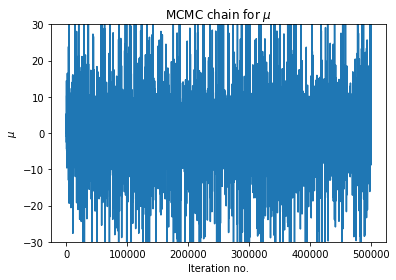

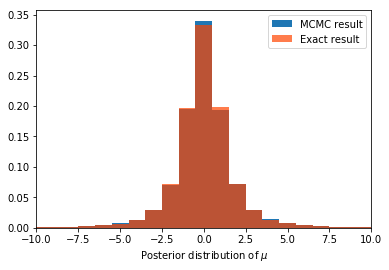

In [23]:
print("The acceptance rate of M-H algorithm is %.2f." % np.mean(accept))

burnin = 0 # how many samples to discard at beginning of chain
mut_pbi = mut[burnin+1:]  # cut off the burn-in portion of the chain

plt.plot(mut_pbi)
plt.ylim(-30,30)
plt.xlabel("Iteration no.")
plt.ylabel(r"$\mu$")
plt.title(r"MCMC chain for $\mu$")
plt.show()

binedges = np.linspace(start=-100.5, stop=100.5, num=202)

plt.hist(mut_pbi, bins=binedges, normed=True,
        label="MCMC result")
plt.hist(stats.t.rvs(df=2, size=Niter-burnin), bins=binedges,
         color="OrangeRed", alpha=0.7, normed=True,
        label="Exact result")
plt.xlim(-10,10)
plt.xlabel(r"Posterior distribution of $\mu$")
plt.legend(loc=0)
plt.show()